***
### 多目标规划模型——组合投资问题
> 1998年国赛A题

#### 模型一：固定风险水平，优化收益

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [2]:
x = cp.Variable(5, pos=True)
r = np.array([5, 28, 21, 23, 25])/100
q = np.array([0, 2.5, 1.5, 5.5, 2.6])/100
p = np.array([0, 1, 2, 4.5, 6.5])/100
u = np.array([0, 103, 198, 52, 40])

M = 1e4

In [3]:
obj = cp.Maximize(cp.sum(cp.multiply(r-q,x)))
a = 0.0
aa = []
P = []
X = []
while a <= 0.05:
    aa.append(a)
    cons = [
        cp.multiply(q, x)/M <= a,
        cp.sum(cp.multiply(1+p, x)) == M
    ]
    prob = cp.Problem(obj, cons)
    prob.solve(solver='GLPK_MI')
    P.append(prob.value)
    X.append(x.value)
    a += 0.0005
X = np.array(X)

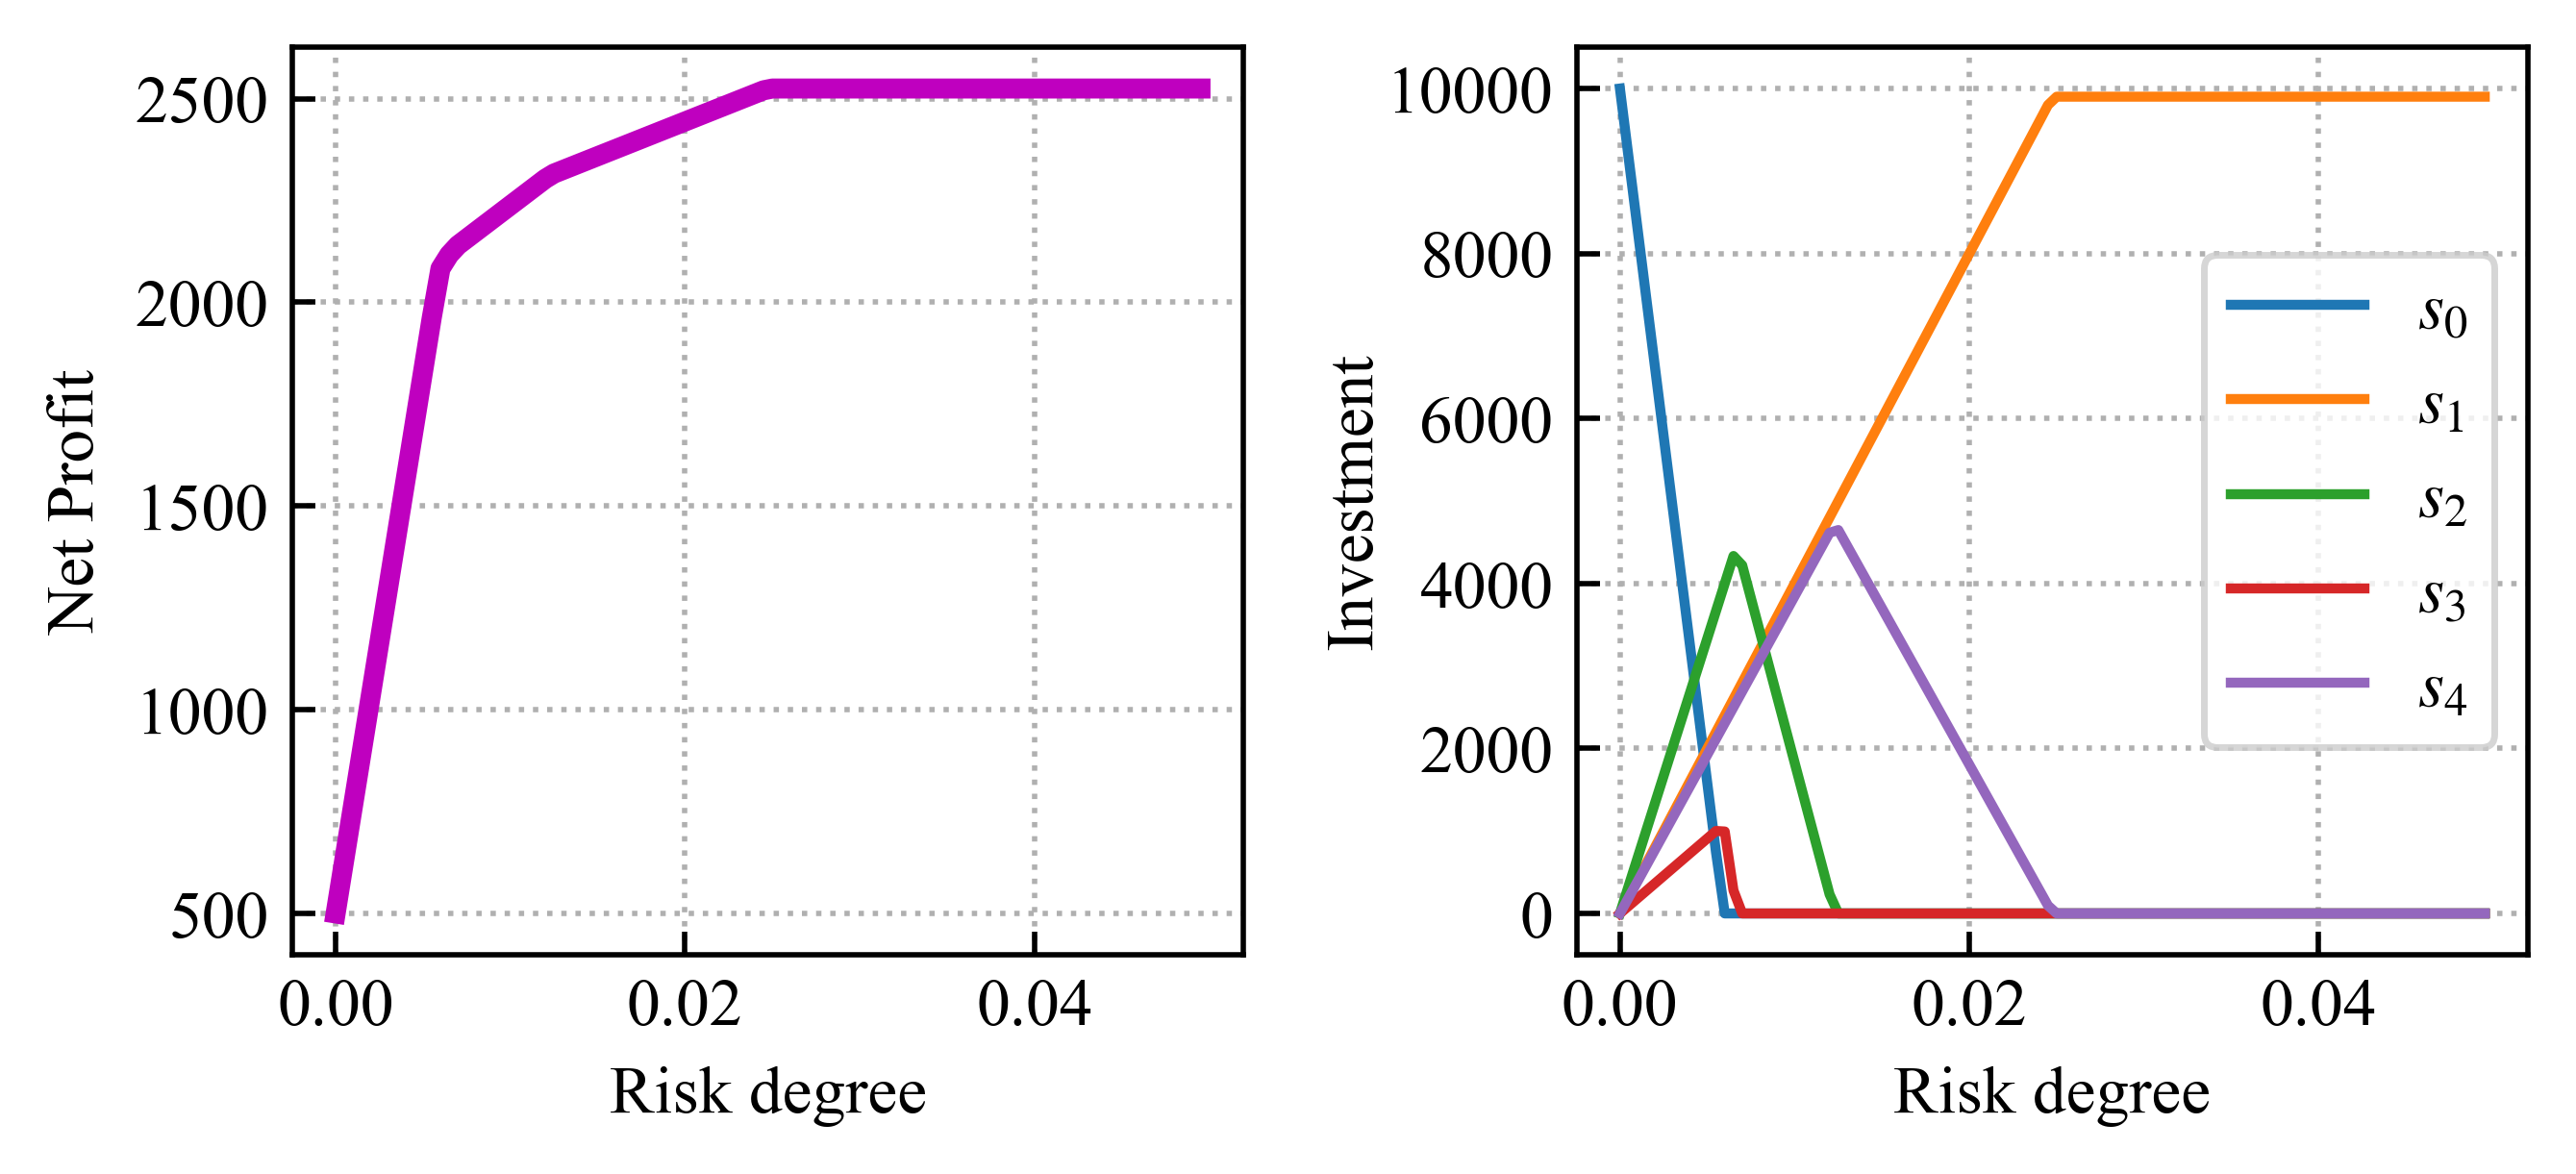

In [4]:
fig = plt.figure(figsize=[6,2.5], dpi=500)
ax = fig.add_subplot(121)
ax.plot(aa, P, 'm', label='Net profit', linewidth=3)
ax.grid(linestyle=':')
ax.set_xlabel('Risk degree')
ax.set_ylabel('Net Profit')
ax1 = fig.add_subplot(122)
for i in range(5):
    ax1.plot(aa, (X.T)[i], label=f'$s_{i}$')
ax1.set_xlabel('Risk degree')
ax1.set_ylabel('Investment', labelpad=0)
ax1.legend()
ax1.grid(linestyle=':')

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=None)
fig.show()

#### 模型二：固定盈利水平，极小化风险

In [5]:
r = np.array([5, 28, 21, 23, 25])/100
q = np.array([0, 2.5, 1.5, 5.5, 2.6])/100
p = np.array([0, 1, 2, 4.5, 6.5])/100
u = np.array([0, 103, 198, 52, 40])
M = 1e4

x = cp.Variable(6, pos=True)
obj = cp.Minimize(x[-1])
k = 0.05
kk = []
P = []
X = []
while k < 0.27:
    kk.append(k)
    cons = [
        cp.multiply(q[1:5], x[1:5]) <= x[-1],
        (r-p) @ x[:-1] >= k*M,
        (1+p) @ x[:-1] == M
    ]
    prob = cp.Problem(obj, cons)
    prob.solve(solver='GLPK_MI')
    P.append(prob.value)
    X.append(x.value)
    k += 0.005
X = np.array(X)

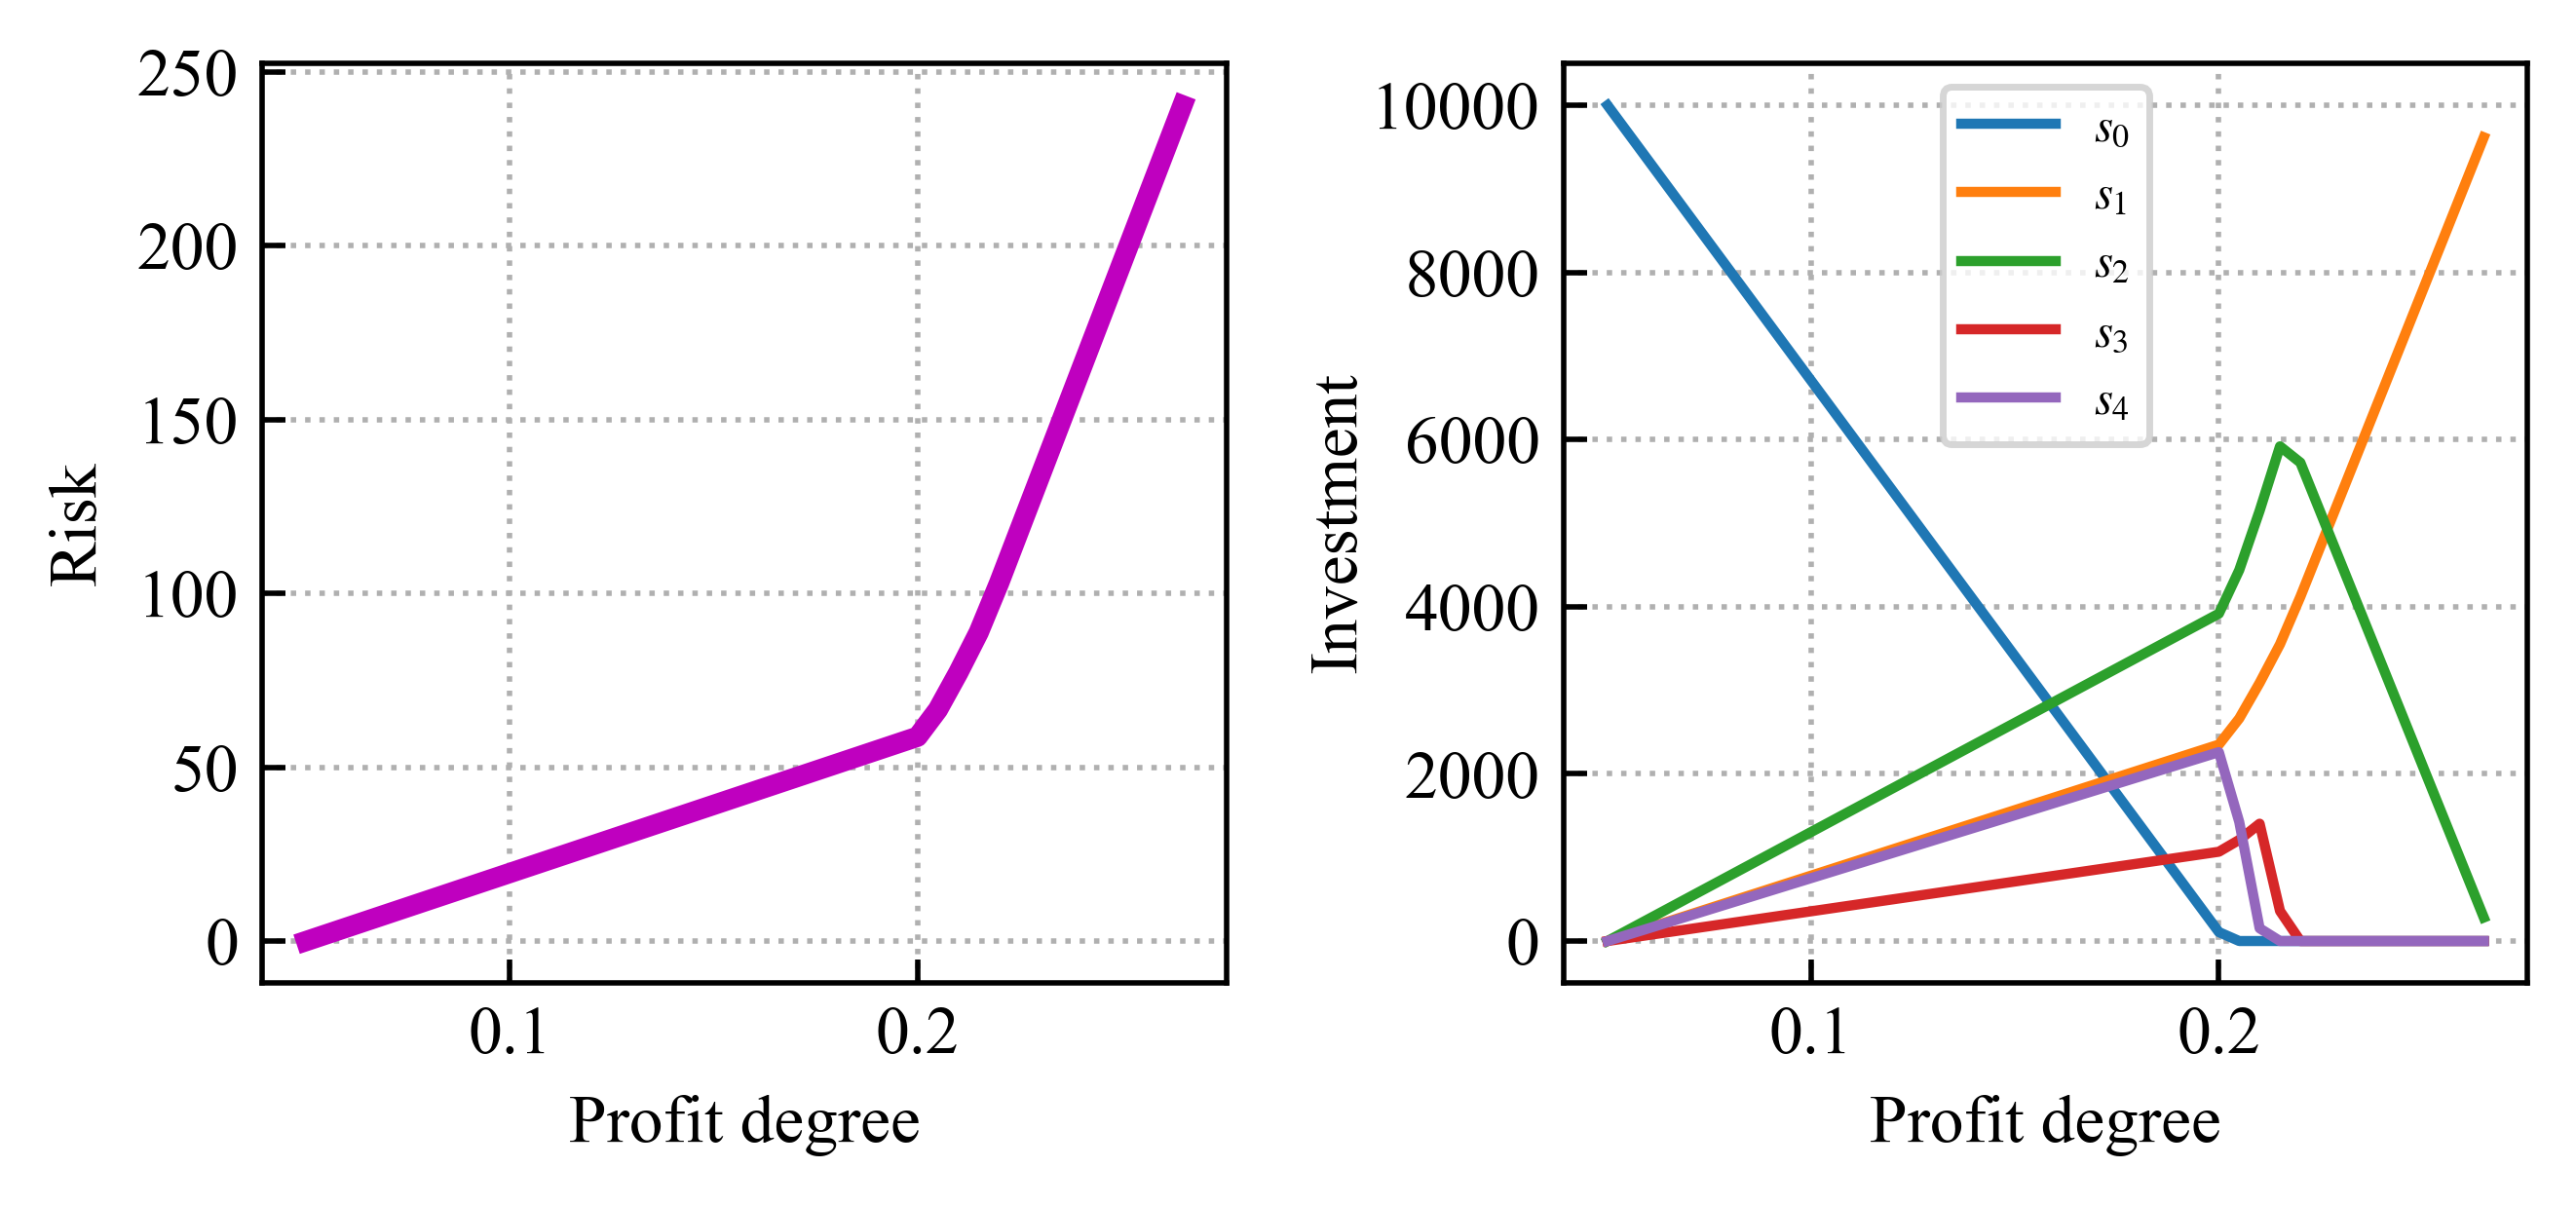

In [6]:
fig = plt.figure(figsize=[6,2.5], dpi=500)
ax = fig.add_subplot(121)
ax.plot(kk, P, 'm', linewidth=3)
ax.grid(linestyle=':')
ax.set_xlabel('Profit degree')
ax.set_ylabel('Risk')
ax1 = fig.add_subplot(122)
for i in range(5):
    ax1.plot(kk, (X.T)[i], label=f'$s_{i}$')
ax1.set_xlabel('Profit degree')
ax1.set_ylabel('Investment', labelpad=0)
ax1.legend(fontsize=7)
ax1.grid(linestyle=':')

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=None)
fig.show()

#### 模型三：两个目标函数加权求和

In [7]:
r = np.array([5, 28, 21, 23, 25])/100
q = np.array([0, 2.5, 1.5, 5.5, 2.6])/100
p = np.array([0, 1, 2, 4.5, 6.5])/100
u = np.array([0, 103, 198, 52, 40])
M = 1e4

x = cp.Variable(6, pos=True)
R = []
P = []
X = []
cons = [
    cp.multiply(q, x[:-1]) <= x[-1],
    cp.sum(cp.multiply(1+p, x[:-1])) == M
]
ww = np.linspace(0, 1, 100)
for w in ww:
    obj = cp.Minimize(w*x[-1] - (1-w)*(r-p) @ x[:-1])
    prob = cp.Problem(obj, cons)
    prob.solve(solver='GLPK_MI')
    xx = x.value
    X.append(x.value)
    R.append(max(q*xx[:-1]))
    P.append((r-p) @ xx[:-1])

X = np.array(X)

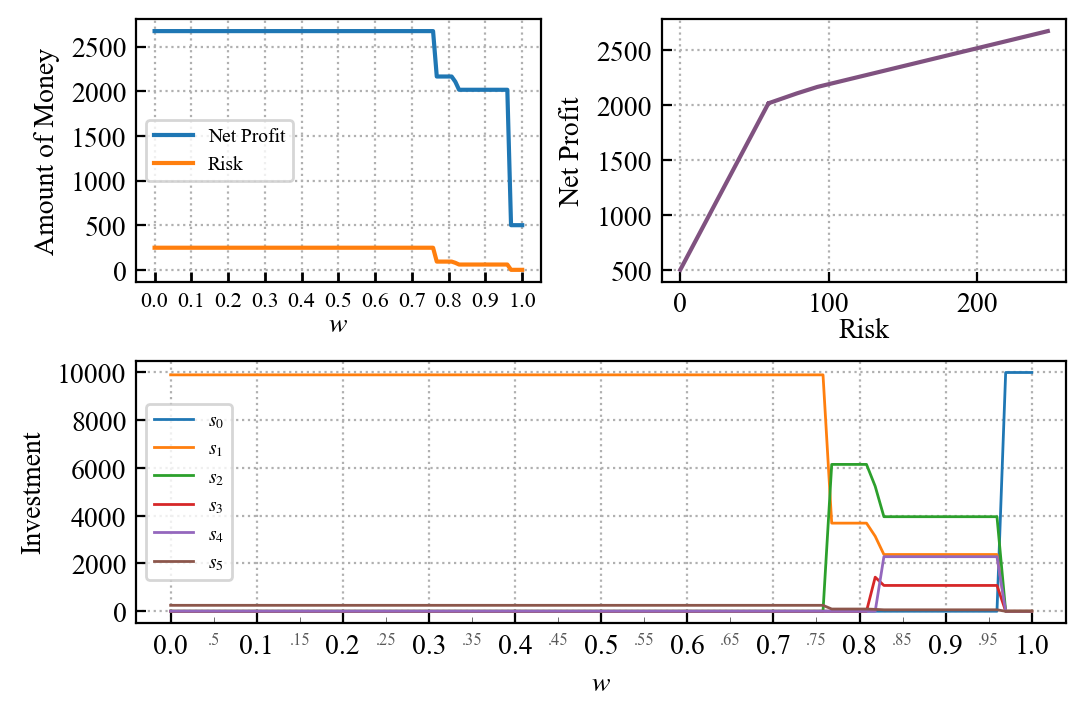

In [8]:
from matplotlib.ticker import MultipleLocator
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(ww, P, label='Net Profit')
ax.plot(ww, R, label='Risk')
ax.set_xlabel('$w$', labelpad=0)
ax.set_ylabel('Amount of Money')
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(500))
ax.tick_params(which='major', axis='x', width=1.0, labelsize=8)
ax.legend(loc='center left', fontsize=7)
ax.grid(linestyle=':')

ax1 = fig.add_subplot(222)
ax1.plot(R, P, color=(128/255, 82/255, 128/255))
ax1.set_xlabel('Risk', labelpad=0)
ax1.set_ylabel('Net Profit')
ax1.yaxis.set_major_locator(MultipleLocator(500))
ax1.grid(linestyle=':')

ax2 = fig.add_subplot(212)
for i in range(6):
    ax2.plot(ww, (X.T)[i], label=f'$s_{i}$', linewidth=1)
ax2.set_xlabel('$w$')
ax2.set_ylabel('Investment')
ax2.set_xbound(-0.04, 1.04)
ax2.xaxis.set_major_locator(MultipleLocator(0.1))
ax2.yaxis.set_major_locator(MultipleLocator(2000))
ax2.xaxis.set_minor_locator(MultipleLocator(0.05))
ax2.xaxis.set_minor_formatter(lambda x, pos: "" if x%(0.1)==0 else f'.{x*100:.0f}')
ax2.tick_params(which='minor', axis='x', width=0.2, labelsize=6, labelcolor='0.35')
ax2.legend(fontsize=7)
ax2.grid(linestyle=':')

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
fig.show()